In [1]:
import matplotlib.pyplot as mplt
import pandas as pd
import numpy as np
import geopandas as gpd
from functools import partial
#from tqdm import tqdm
from types import MappingProxyType

from falcomchain.helper import DataHandler, Plot, plot_grid
from falcomchain.partition import Partition, Assignment
from falcomchain.markovchain import SingleMetricOptimizer
from falcomchain.markovchain.proposals import hierarchical_recom
from falcomchain.grid import Grid
from falcomchain.travel_time.traveltime import travel_time

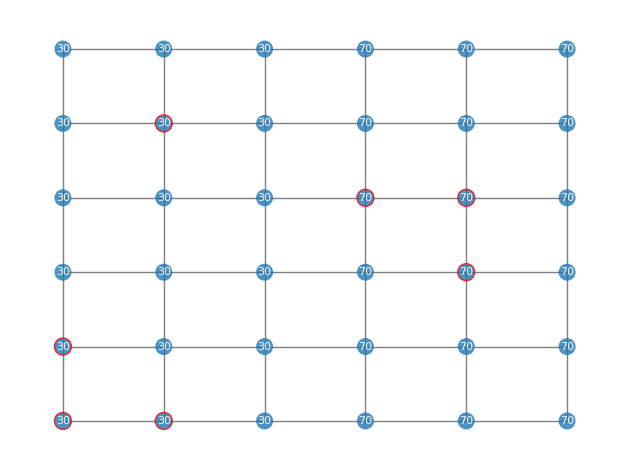

In [7]:
grid_half = Grid(dimensions=(6,6), num_candidates=9, density='opposite', threshold=(3,0))
graph_half = grid_half.graph
plot_grid(grid_half.graph)

In [ ]:
grid_uniform = Grid(dimensions=(20,20), num_candidates=50, density='uniform', threshold=(10,0))
graph_uniform = grid_uniform.graph
plot_grid(grid_uniform.graph)

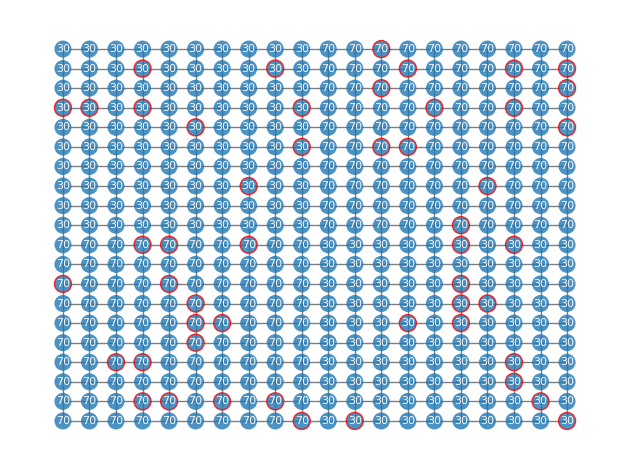

In [5]:
grid_opposite = Grid(dimensions=(20,20), num_candidates=50, density='opposite', threshold=(10,10))
graph_opposite = grid_opposite.graph
plot_grid(grid_opposite.graph)

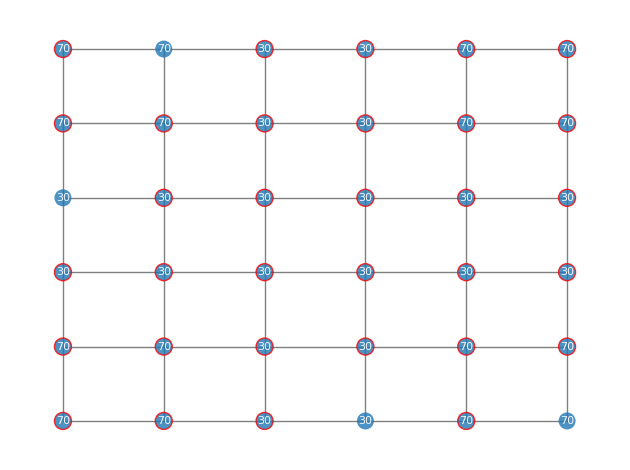

In [2]:
# if k_1 <= x <= m - k_1 or k_2 <= y <= n - k_2, then pop is 30. Here, theresold = (k_1, k_2) and dimensions=(m,n)
grid_corners = Grid(dimensions=(6,6), num_candidates=32, density='corners', threshold=(2,2))
graph_corners = grid_corners.graph
plot_grid(grid_corners.graph)

In [5]:
def travel_times(graph):
    candidates = {node for node in graph.nodes if graph.nodes[node]['candidate']==True}
    for u, v in graph.edges():
        graph[u][v]['time'] = 10
    travels = travel_time(graph, candidates)
    return travels

travels = travel_times(grid_corners.graph)

In [6]:
pop = sum(grid_corners.graph.nodes[node]['population'] for node in grid_corners.graph.nodes)
print(pop)
ideal_pop = pop/6
print(ideal_pop)

1720
286.6666666666667


In [6]:
from typing import Optional
import random
def assign_candidates(graph, num_candidates, candidate_ignore:Optional[int]=None) -> None:
        "Sets self.num_candidates many nodes as candidates uniformly random on permitted region"
        nodes = set(graph.nodes)
        
        if candidate_ignore != None:
            x_0, y_0 = candidate_ignore
            ignore = {node for node in nodes if node[0] < x_0 or node[1] < y_0}
            nodes = nodes - ignore
        
        candidates = random.choices(population = list(nodes) , k = num_candidates)
        
        for node in graph.nodes:
            if node in candidates:
                graph.nodes[node]['can'] = True
        else:
            graph.nodes[node]['can'] = False
        
        return graph

s = assign_candidates(graph_corners, num_candidates=32)

pop = sum(1 for node in grid_corners.graph.nodes if grid_corners.graph.nodes[node]['can']==True)
pop



KeyError: 'can'

In [13]:
nodes = graph_corners.nodes
print(len(nodes))
import random
candidates = random.choices(population = list(nodes) , k = grid_corners.num_candidates)
print(candidates)
print(len(candidates))

36
[(3, 2), (5, 0), (3, 3), (5, 5), (0, 3), (5, 2), (3, 3), (4, 1), (1, 0), (5, 5), (5, 4), (2, 3), (4, 2), (5, 5), (3, 5), (3, 0), (3, 5), (2, 3), (3, 3), (3, 3), (5, 1), (5, 1), (3, 2), (2, 1), (4, 1), (2, 4), (5, 1), (5, 4), (5, 2), (3, 5), (4, 3), (4, 4)]
32


In [7]:

"Initial partition"
from falcomchain.partition import Assignment
from types import MappingProxyType
pop = sum(grid_corners.graph.nodes[node]['population'] for node in grid_corners.graph.nodes)
#area = sum(grid_corners.graph.nodes[node]['area'] for node in grid_corners.graph.nodes)    
# nodelarin density check i burda yapilip sonuc attribute olarak atansin. Attribute ismi simdilik density
#check_density = ?
Assignment.travel_times = MappingProxyType(travels)
column_names = ['population', 'area', 'candidate', 'density'] # density attribute ata. If density is not considered, then we have to pass false.

initial_solution = Partition.from_random_assignment(
graph=grid_corners.graph, 
assignment_class=Assignment,
capacity_level = 1,
epsilon=0.01,
pop_target = pop / 6,
column_names = column_names,
#density = 0.5
)

--------------iteration starts
remaining pop 1720
pop of selected node:1720
pop of selected node:100
pop of selected node:30
pop of selected node:30
pop of selected node:100
pop of selected node:70
pop of selected node:1550
pop of selected node:980
pop of selected node:880
pop of selected node:30
pop of selected node:310
pop of selected node:140
pop of selected node:500
pop of selected node:30
pop of selected node:820
pop of selected node:790
pop of selected node:370
pop of selected node:30
pop of selected node:470
pop of selected node:440
pop of selected node:30
pop of selected node:760
pop of selected node:700
pop of selected node:30
pop of selected node:70
pop of selected node:410
pop of selected node:30
pop of selected node:60
pop of selected node:270
pop of selected node:140
pop of selected node:140
pop of selected node:340
pop of selected node:130
pop of selected node:100
pop of selected node:70
pop of selected node:70
ideal pop 286.6666666666667
epsilon 0.010000000000000026
root

RuntimeError: Could not find a possible cut after 5000 attempts.